# Silver Decay Simulation

## Section 0: Basics

### What you already know
In the Radioactivity experiment, you and your lab group created a simulation of a single decay process using Montecarlo methods. This time out, you will be adding a few wrinkles to the problem: you wil be simulating a system with two different isotopes with two different decay rates, and will also be considering how to systematically deal with background signal. Simulating this type of process is especially useful in this case, since in simulation you can distinguish between which decays are due to which source (one of the two isotopes or the background), while in an experiment you can't parse these out; you can only measure the total number of counts. Being able to see how these "hidden details" combine to give the full output will be extremely helpful once you are running the physical experiment where you don't have access to this info.

To get you started on the simulation part of lab, your group will start by working through the same steps you took in the Radioactivity lab to simulate the single decay process. The reasons for going through this again are twofold: to refresh your memory on the procedure (it's possible that members of your group may have not thought about this for over 5 weeks!), and also to ensure that all your group members agree on the specific process you are using on the simpler problems before making them harder by adding background signal and multiple isotopes. You will likely find that different group members may want to employ slightly different approaches to execute certain tasks in your code; this is good! It's an opportunity to see mulitple ways to come at the same problem and discuss the merits of each approach before deciding on one particular one.

One last note: Try to avoid looking at your previous code as you work on this! It's super easy to just mimic what you did last time without really understanding/remembering why you did it that way. This will only make things harder once you get to the more complicated part of the simulation.

### Why Simulation
Previously you've seen that computational methods can be used to generate solutions to physics problems that are hard or impossible to solve using analytical (exact, algebraic) methods.  For example, we solved for the motion of a particle using Euler's method.  Another common use of computational methods is to generate a simulation of an experiment before it's performed, or even of an experiment that is not practical to perform in the lab.  This has many advantages.  Physicists' understanding of the physical process can be enhanced through the generation of a visualization of what will happen.  Simulation can produce a data set on which one can practice analysis methods.  One can gain access to information about the process that can't be measured directly on the real system.  In a sense, we're turning our computer into a virtual version of the real experiment.  In the process we'll get insight about how to design the real experiment before we spend the time and/or money required to build and run it.  Helpful as this is, it's important to note that it can't replace the real experiment, but is complementary to it.  The computer will generate data according to the theory we give it, any theory!  Only nature can tell us which theory best describes our universe.

### Montecarlo Methods

Montecarlo simulations are used for a lot of things, but one application, the one we're using here, is to simulate a process that has some intrinsic randomness to it.  It makes use of the computer's ability to generate lists of random numbers.  This generation ability is analogous to rolling dice.  If 100 dice are tossed, the result will be a list of 100 random numbers between 1 and 6 inclusive.  In Python, the command $\verb|rand(n)|$ can be used to generate a list of n random numbers between 0 and 1.  Try it out by activating the code below.

In [1]:
from pylab import *
%matplotlib inline 

rand(5)

array([0.73897848, 0.79184106, 0.16921813, 0.45123577, 0.26022639])

One can then build simulations of random processes as you did in the prelab.  Basically all computational environments have similar capability, and $\verb|rand|$ can be used in a variety of ways.  If you want to learn more about $\verb|rand|$, you could google it later.  You could even build a computer simulation of my 100 dice toss example.

# Section 1
### Our simulation part 1

The code below simulates the decay of a radioactive isotope and plots the number of nuclei as a function of time.  The theoretical curve given by
$$n=n_0 e^{-\lambda t}$$
is plotted in blue (see graph after the code below).  Here $\lambda = \frac{\ln 2}{t_{1/2}}$, where $t_{1/2}$ is the half life.  Note that it looks like the nice familiar decaying exponential.  The red points are a simulation.  No one can say when a particular nucleus will decay.  We can only assign a probability that it will decay in some window of time $dt$.  That probability is given by $\lambda dt$.  If one has a large number nuclei, then the number of atoms left after a time $t$ should approach the theoretical curve.  The point is that in a give die roll, you can't say whether you'll get a 5 or not, but if you roll the die $n$ times, the number of times 5 comes up will approach $n/6$ for large $n$ (think like $n=1000$).  You'll see that the red points below are clustered around the blue theory curve, but not right on it.  That's because these simulated points are generated by taking the randomness into account with our Montecarlo method.  It's important to note that these points are a more accurate reflection of what one would expect to see in experimental data than the theory curve!  Experiment will not generate a smooth curve here.  It will generated points distributed around the blue line in a way that's qualitatively similar to the red simulated points.

In [4]:
thalf = 60 #half life is 60s
lamb = log(2)/thalf 
#note, I don't know what lambda is in python, but it's something, so I'll use lamb
dt=0.5 # pick a time scale short compared to the characteristic time (thalf)
steps = 5*int(thalf/dt) #run the simulation every dt for 5 half lifes
tmax = steps*dt #starting at t=0, we run to a max time
n = 1*10**4 # start with a lot of atoms
t = linspace(0,tmax,steps) # make an array of times 
nth=n*exp(-lamb*t) # theoretical number of remaining atoms
ncomp=[] # start a list with the number of atoms at each time t
for i in range(0,steps):
    rnumbers = rand(n)
      # make a list of n random numbers (one for each atom). Each random number is between 0 and 1 
      # and represents the probability of a particular atom decaying
    rnumbers = [j for j in rnumbers if j < dt*lamb]
      # We need to determine which of our n atoms have decayed. To do this, we need to set some cutoff.
      # Below this cutoff the atom decays. Above this cutoff the atom does not decay. Since dt*lamb
      # represents the probability of a decay occurring, we use this value as the cutoff.
      # the command above replaces the list rnumbers with only the elements that were below cutoff
      # in other words, we throw out the numbers above cut off.
      # the code in [] searches the array for numbers below cut off.
      # in detail, it says, make a number j that was originally an element of rnumbers remain an element
      # only if it is below cut off
      # For all atoms (i.e., elements j in rnumbers) where the random number (i.e., probability) is less than
      # dt*lamb (our probability cutoff), the atom decays and we record it. Otherwise, that particular atom is
      # removed from the list rnumbers because it doesn't decay. In the end, rnumbers just contains the atoms that decayed.
    counts =len(rnumbers)
      # The len() command counts the number of elements in an array. Thus this command counts the number of elements
      # in rnumbers. Since rnumbers only keeps the atoms (i.e., elements) that have decayed,
      # counts is then the number of nuclei that have decayed in the time dt (our time step).
    n=n-counts #replace n with the number of atoms left
    ncomp=append(ncomp,n) #put the number of atoms left at this step in the list


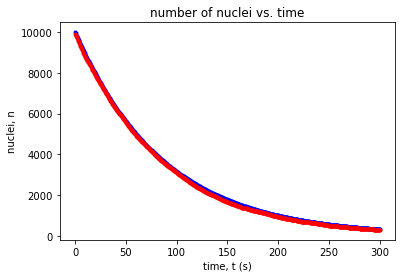

In [5]:
plot(t,nth,'b.',t,ncomp,'r.')
title("number of nuclei vs. time")
xlabel("time, t (s)")
ylabel("nuclei, n")
show()

### Exercise 1

(a) Talk through the code with your lab group and make sure you understand what every line does.  Make sure everyone in your group is comfortable with what the commands used tell the computer. If you have a question, be sure to ask.  The product of each trip through the for loop is the number of atoms left after an additional 0.5 seconds pass.  Be sure to explain to each other how each of the 5 lines in the loop contributes to this goal.  In particular, why does the line $\verb|rnumbers = [j for j in rnumbers if j < dt*lamb]|$ give us what we want?  Your explanation should include what happens in the limit of a very tiny decay probability, $\lambda dt << 1$.

This line keeps j in the array rnumbers if j is less than the value dt*lamb. This allows us to only keep the randomly generated numbers that are less than the probability specified, which then allows us to run a successful Monte Carlo simulation. If $\lambda dt << 1, then we get very few or no points for the red graph.

(b)  Change the number of atoms to 10000 and re-run the code.  Write a description of what happens and why, statistically speaking, you would expect this result.
The red curve is smoother and matches the blue curve better. This is because we now have a larger sample size, so there will be more points that satisfy the Monte Carlo condition, giving us more data to plot. This brings us closer to having a more precise data set.

# Section 2
### Our simulation part 2

In our experiment, it's actually the number of decays/time we have access to, not the number of a given isotope we have left.  A detector will "catch" a decay product from some fraction of the decays and count the number of times it catches something in a time $dt$. We should note that $dt$ is a parameter that we, as the experimenters, set.  It will then provide the number of counts in that window of time. Here we'll start changing what we simulate to match the experiment we'll do.  Note however, that part 1 was an important part of the process.  The point was to check our methods against an analytical result we know to give us some feedback on whether the simulation method we're using gives us a reasonable, reliable result.  With that done, we'll change our simulation to match the data that the real experiment will provide via the following steps.  

(1)  Copy the code from simulation in part 1 (both cells - notice the two blank cells below) into code cells below with $n$ now at 10000.  Run the code and make sure you get the same thing you had above.  Remember, it's always good to run the code after each change rather than waiting until after a bunch of changes are made.  This way, if you introduce a bug, you'll have a better chance of knowing where it is.  If all goes well, remove the comments from the code.  This will avoid confusion with the new comments you'll add.  In completing each of the steps below, add a comment on or right after the line(s) you change indicating the step number and what you changed.  This is what your comment would look like if you implemented a hypothetical step 9 (there is no real step 9 here) $\verb|#Step 9, replaced x=10 with x=15|$.

(2)  Remove all references to the theoretical result (i.e., blue points) in the code you've pasted and test the code.  If you get a result you expect, move on.

(3)  Change the code such that it plots the number of counts vs. time, instead of the number of atoms left vs. time. (It might help to rename some of the variables to reflect the change in what it is keeping track of.)

(4)  Change the code (modifying the changes you just made) such that it plots the counts per time (counts divided by the size of the counting window) vs. time.  Test the code.

In [18]:
thalf = 60
lamb = log(2)/thalf
dt=0.5
steps = 5*int(thalf/dt)
tmax = steps*dt
n = 1*10**4
t = linspace(0,tmax,steps)
# step 2: removed reference to theoretical result
ncomp=[]
ncounts=[] # step 3: created ncounts array
for i in range(0,steps):
    rnumbers = rand(n)
    rnumbers = [j for j in rnumbers if j < dt*lamb]
    counts = len(rnumbers)
    ncounts.append(counts/dt) # step 3: added each counts value to ncounts. step 4: changed counts to counts per time
    n=n-counts
    ncomp=append(ncomp,n)

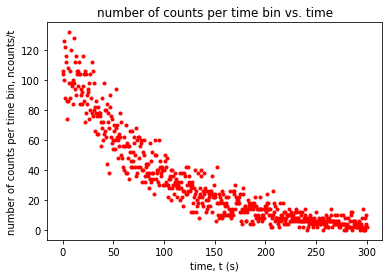

In [20]:
plot(t,ncounts,'r.') # step 2: removed blue line. step 3: changed ncomps to ncounts
title("number of counts per time bin vs. time") # steps 3 and 4: changed title to describe the arrsy we are plotting
xlabel("time, t (s)")
ylabel("number of counts per time bin, ncounts/t") # steps 3 and 4: changed ylabel to describe the array we are plotting
show()

Up to perhaps some sources of experimental error and systematic effects, which you have not coded, your plot should look like what would be generated when $10^4$ radioactive nuclei with a half life of 1 minute are placed under a detector that can catch all of the products.  If you followed the above steps, your plot should look like the following.  If it does not, do some checks and ask your instructor or LA if needed.

<img src="template_image_1.png" style="width: 500px;"/> 

# Section 3

### Our simulation part 3

One advantage of simulation is that it generates a data set where you know the answer so you can develop and practice data analysis.  Let's analyze this data and see if we can recover our expected decay constant.  To do so, complete the following steps:

(1)  Copy the code from part 2 into a code cell below.  Again, remove all existing comments.

(2)  We'll want to linearize the data before we try fitting it.  Clearly count rate vs. time is not linear.  Change the plotting code such that something other than count rate is on the vertical axis such that a linear relationship is expected.  Document the changes to the code as you did in Section 2.  If you want to employ a mathematical operation you have not used before in Python, google it!  Also remember that mathematical operations can be applied to lists.  Implement this step by changing only the argument of the plot function.  When you get this right, you'll have a data set that looks like it could be fitted to a line.  Note that unlike experimental data, this data is guaranteed to look linear if you did it right since we created the data assuming the expression you're using to linearize the data.  In addition to your plot, you'll also notice that you get an error message related to performing a problematic mathematical operation on points for which the count rate is zero.  We'll address this issue in step (3) next.

(3)  The problematic points noted in (2) occur late in the data set, after most of decays have happened.  One solution is to stop collecting data once this starts to happen.  Another is to excise them from the data since there will only be a small number of them, and this won't change the data too much.  To implement the first idea, add the following code to your program in an appropriate spot

```python
    if counts<=0:
       break
```

You'll also need to handle your time array differently such that it remains the same length as your count rate array.  To do this, you will want to create a new array to handle time. Then update this array in your loop with the time value associated with the counts. Finally you will need to update your plotting code to reference the appropriate time arrat. Once you've handled these issues, you should have a plot that looks like the following and no more error messages.

<img src="template_image_2.png" style="width: 500px;"/> 

(4)  Now we'd like to get the data out as a list that we can take into curve.fit for fitting.  To do this, paste the following code (with modifications as suggested in the code comments) into a code cell below the program you just created.  The code will create a .csv file in the directory where you're currently working that has the list of x,y points from which your latest plot was created.

```python
import csv

csvfile = "data.csv" #This can be anything ending in .csv, it's a name for the file where stuff will be stored

with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    writer.writerows(zip(t,y)) #Note t is the list of times.  Replace 'y' with whatever the name of the list is that stores your count rate.
```

Activate your cell and see if the file data.csv is created in your current directory.

(5) Open data.csv with your favorite spreadsheet program (Microsoft excel, Libreoffice sheets, etc.).  Save it under a new name.  Otherwise it will be over-written if you re-run your code.  Create a new column in your sheet that turns the count rate column into whatever you want on the y axis.  Create new columns in the spread sheet that calculate the uncertainty in your values.  Order these columns $x, \delta x, y, \delta y$.  Then copy-paste all of the data into curve.fit, fit your data, and see if you get the expected $\lambda$.  Again, since we are fitting to the equation that made the data, you should get the $\lambda$ you put in within uncertainty with a good (close to 1) $\chi^2$ value.  Note that there is still some uncertainty introduced by our use of random numbers.  Show your LA or instructor your fit. Keep a copy on Lab Archives. The title should indicate that this fit is for linearized radioactive decay of a single atomic species or something to that effect.

In [45]:
thalf = 60
lamb = log(2)/thalf
dt=0.5
steps = 5*int(thalf/dt)
tmax = steps*dt
n = 1*10**4
t = linspace(0,tmax,steps)

ncomp=[]
ncounts=[]
time_array=[]
for i in range(0,steps):
    rnumbers = rand(n)
    rnumbers = [j for j in rnumbers if j < dt*lamb]
    counts = len(rnumbers)
    if counts>0: 
        ncounts.append(counts/dt)
        time_array.append(i*dt)
    n=n-counts
    ncomp=append(ncomp,n)

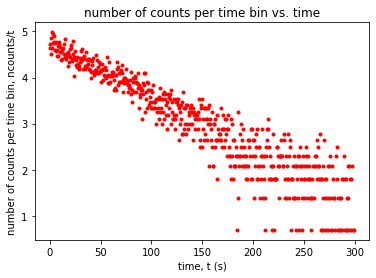

In [46]:
plot(time_array,np.log(ncounts),'r.')
title("number of counts per time bin vs. time") 
xlabel("time, t (s)")
ylabel("number of counts per time bin, ncounts/t") 
show()

In [47]:
import csv

csvfile = "data.csv" #This can be anything ending in .csv, it's a name for the file where stuff will be stored

with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    writer.writerows(zip(time_array,np.log(ncounts))) #Note t is the list of times.  Replace 'y' with whatever the name of the list is that stores your count rate.

# Section 4
### Our simulation part 4

Everything we've done so far assumes only one decaying species is present.  If we have 2, our detector will just detect the products of both decays and give the total number of counts.  Here we'll assume we have another species with half life 17 seconds present along with our original 60 second half life species.  We'll assume we also start with 10000 of these nuclei.

Copy and past the code from Section 3 below.

Duplicate each of the variables describing the decaying nuclei.  For example we have the half life $\verb|thalf = 60|$ in the original code, we need to add $\verb|thalfb = 17|$, we have a lamb, we'll need to add a corresponding lambb, etc.  Continue this process of adding code to do the same job for the second species.  Add a new list to store the total number of counts for this new species, which you'll take the $ln$ of in the plot section.  The result should look a little like the following, which is what you get if you have a 60s half live and an 8s half life.  Note also that you should adjust the argument of your if statement that breaks the loop if the total counts get too low.

<img src="template_image_3.png" style="width: 500px;"/> 



In [88]:
thalf = 60
thalfb = 17
lamb = log(2)/thalf
lambb = log(2)/thalfb
dt=0.5
steps = 5*int(thalf/dt)
stepsb = 5*int(thalfb/dt)
tmax = steps*dt
tmaxb = stepsb*dt
n = 1*10**4
t = linspace(0,tmax,steps)
tb = linspace(0,tmaxb,stepsb)

ncomp=[]
ncounts=[]
ncountsb=[]
time_array=[]
time_arrayb=[]
for i in range(0,steps):
    rnumbers = rand(n)
    rnumbersb = rand(nb)
    rnumbers = [j for j in rnumbers if j < dt*lamb]
    rnumbersb = [k for k in rnumbersb if k < dt*lambb]
    counts = len(rnumbers)
    countsb = len(rnumbersb)
    if counts>0:
        ncounts.append(counts/dt)
        time_array.append(i*dt)
    if countsb>0:
        ncountsb.append(countsb/dt)
        time_arrayb.append(i*dt)
    n=n-counts
    nb=n-countsb
#    ncomp=append(ncomp,n)

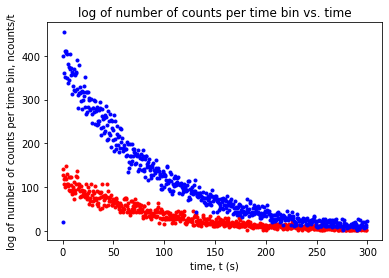

In [89]:
plot(time_array,ncounts,'r.',time_arrayb,ncountsb,'b.')
title("number of counts per time bin vs. time") 
xlabel("time, t (s)")
ylabel("number of counts per time bin, ncounts/t") 
show()

In [92]:
counts_tot=np.array(ncounts)+np.array(ncountsb[0:-16])
print(len(ncounts))
print(len(ncountsb))

584
600


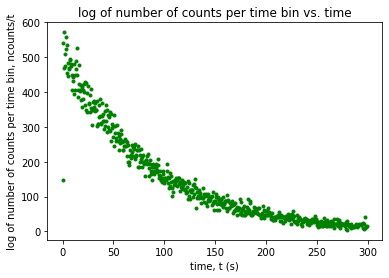

In [93]:
plot(time_array,np.array(counts_tot),'g.')
title("number of counts per time bin vs. time") 
xlabel("time, t (s)")
ylabel("number of counts per time bin, ncounts/t")
show()

There is a "knee" in this graph, that is, it looks like it could be fit to one line at early times, and a different line at late times.  Call an LA over and explain why this happens based on what is happening to the population of nuclei.

If the half lives were closer, you might not see the knee by eye.  Try making the half lives 25 s and 60 s.  Do you see the knee in your plot?  Can you tell if it's one decay rate, like in Section 3 or 2 decay rates like in Section 4?  I don't think so.
We see the knee because one of the isotopes decays firt and then the other one begins to dominate!
Take a look at the document called "25_60Fit_Handout" that is posted on Lab Archives.  It's a fit to this data (25 s and 60 s half lifes together) just like the fit you made in part 3.  There are at least 2 (related) clues that this is 2 different nuclei decaying together.  What are they?  Note this method is not fool proof.  If you had 2 nuclei with almost the same decay rate, you might not pull out the difference even with this method unless there is enough data.
The slope decreases after a bump in the data which is approximately where we observed the knee. The data points are also further off the line of best fit

# Section 5

### Our simulation part 5

To get further intuition for what's happening, let's plot just the counts that come from nucleus A with green points, just the counts that come from nucleus B with blue points, and the total, all on the same graph.  You can't do this in the real experiment. Since the detector just counts decays, it can't tell where they came from, but we can do it in our simulation easily enough.   Copy and paste the code for Section 4 in code cells below.  Modify the code to achieve this task.  Don't worry about the error message this time.

Look at your plot?  Does it make sense?  What does it suggest about a fit you can do to (approximately) get at just the slow half life?  Once you have the slow half life, what can you do with your data to get the fast half life?  Once you have a plan, call a LA over and have them check your plan.  As you do this, remember that you can use the green and blue points to guide your thinking, but your analysis can only rely on the data behind the red points.  Don't carry out your analysis yet.  We're going to explore one other issue below first.

In [112]:
thalf = 60
thalfb = 17
lamb = log(2)/thalf
lambb = log(2)/thalfb
dt=0.5
steps = 5*int(thalf/dt)
stepsb = 5*int(thalfb/dt)
tmax = steps*dt
tmaxb = stepsb*dt
n = 1*10**4
t = linspace(0,tmax,steps)
tb = linspace(0,tmaxb,stepsb)

ncomp=[]
ncounts=[]
ncountsb=[]
time_array=[]
time_arrayb=[]
nb=10**4
for i in range(0,steps):
    rnumbers = rand(n)
    rnumbersb = rand(nb)
    rnumbers = [j for j in rnumbers if j < dt*lamb]
    rnumbersb = [k for k in rnumbersb if k < dt*lambb]
    counts = len(rnumbers)
    countsb = len(rnumbersb)
    if counts>0 or countsb>0:
        if countsb<0:
            ncountsb.append(0)
        ncounts.append(counts/dt)
        time_array.append(i*dt)
        
        ncountsb.append(countsb/dt)
        time_arrayb.append(i*dt)
    
        
    n=n-counts
    nb=nb-countsb
#    ncomp=append(ncomp,n)

In [107]:
counts_tot=np.array(ncounts)+np.array(ncountsb)
print(len(ncounts))
print(len(ncountsb))

582
582


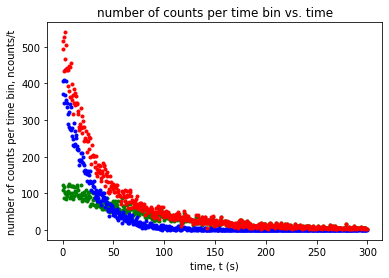

In [108]:
plot(time_array,ncounts,'g.',time_arrayb,ncountsb,'b.', time_array,np.array(counts_tot),'r.')
title("number of counts per time bin vs. time") 
xlabel("time, t (s)")
ylabel("number of counts per time bin, ncounts/t") 
show()

In [109]:
csvfile = "data.csv" #This can be anything ending in .csv, it's a name for the file where stuff will be stored

with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    writer.writerows(zip(time_array,counts_tot))
    #Note t is the list of times.  Replace 'y' with whatever the name of the list is that stores your count rate.

### Our simulation part 6

Before imlementing your plan, consider the following experimental complication.  There are other decays going on in the room that generate a "background".  If you ran this experiment with no radioactive material under the detector, your data might looks something like what's generated by the following code (activate it).

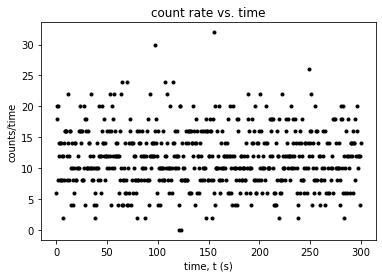

In [115]:
thalf = 600
lamb = log(2)/thalf 
dt=0.5 
steps = len(time_array) 
tmax = steps*dt 
n = 1*10**4 
t = linspace(0,tmax,steps) 
countlistBac=[]
for i in range(0,steps):
    rnumbers = rand(n) 
    rnumbers = [j for j in rnumbers if j < dt*lamb]
    counts =len(rnumbers) 
    countlistBac=append(countlistBac,counts/dt) #Step 2, add natural log of count rate
plot(time_array,countlistBac,'k.') 
title("count rate vs. time") #Step 2, relable plots
xlabel("time, t (s)")
ylabel("counts/time") 
show()

Copy and paste just the plotting section of your code from part 5 below.  Add the background, $\verb|countlistBac|$ to your total counts below as you plot your red point (you don't need to plot the background spearately below).  Now again, if you only have the data associated with the red dots, how can you remove the background before implementing your plan above?  Remember, the background is random.

In [117]:
total = np.array(counts_tot) + np.array(countlistBac[:-5])

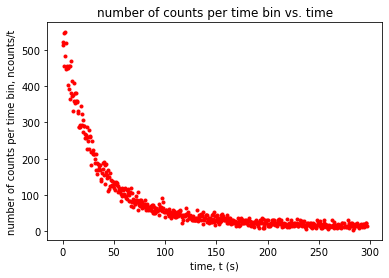

In [121]:
plot(time_array[:-5],np.array(total),'r.')
title("number of counts per time bin vs. time") 
xlabel("time, t (s)")
ylabel("number of counts per time bin, ncounts/t") 
show()

Use the code that exports data again to get a CSV file that contains total counts (A + B + Background) in one column and time in the other.  Implement your plan on this data to find the half lives.  How well do you do?

In [123]:
import csv

csvfile = "datacombined.csv" #This can be anything ending in .csv, it's a name for the file where stuff will be stored

with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    writer.writerows(zip(time_array,total)) #Note t is the list of times.  Replace 'y' with whatever the name of the list is that stores your counts.